<a href="https://colab.research.google.com/github/Palermo01/projectDemo/blob/master/ejercicio_uno_m3p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A E R O L Í N E A**


Para el primer ejercicio se proporciona una tabla que contiene una serie de preguntas realizadas a los usuarios de una aerolínea, con el fin de conocer su opinión de los distintos aspectos y comodidades del viaje.

In [ ]:
!pip install watermark

In [ ]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2025-10-30T21:43:37.942256+00:00

Python implementation: CPython
Python version       : 3.12.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.6.105+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



# Bibliotecas básicas

In [ ]:
import numpy as np
import pandas as pd
import warnings

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from math import ceil
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 16

warnings.filterwarnings('ignore')

# Datos

In [ ]:
data_path = '/content/data_practica_encuesta.csv'

encuesta = pd.read_csv(data_path)
estrellas = encuesta.copy()

### _Funciones_

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
def data_descripcion(df):
    print("Cantidad de filas:", df.shape[0])
    print("Cantidad de columnas:", df.shape[1])

    print("\nRegistros duplicados:", df.duplicated().sum())

    print("\nVariables:", df.columns.tolist())

    print("\nCantidad de valores ausentes en el dataframe:", df.isnull().sum().values.sum())

    print("\nValores únicos por columna:\n")
    unicos = df.nunique().to_frame(name='Valores Únicos')
    return unicos.T

In [ ]:
def valores_ausentes(dataframe):
    if dataframe.empty:
        print("El DataFrame está vacío, no hay datos para analizar.")
        return pd.DataFrame()
    print(f"Registros: {len(dataframe)}\n")

    cantidad_ausentes = dataframe.isnull().sum()
    porcentaje_ausentes = (cantidad_ausentes / len(dataframe)) * 100
    tipos_de_datos = dataframe.dtypes

    resumen_ausentes = pd.DataFrame({
        'Cantidad Ausentes': cantidad_ausentes,
        'Porcentaje Ausentes (%)': porcentaje_ausentes,
        'Tipo de Dato': tipos_de_datos
    })

    resumen_ausentes = resumen_ausentes.sort_values(by='Porcentaje Ausentes (%)', ascending=False)

    # DataFrame filtrado
    resumen_ausentes_filtrado = resumen_ausentes[resumen_ausentes['Cantidad Ausentes'] > 0]

    #print(resumen_ausentes_filtrado)

    return resumen_ausentes_filtrado

In [ ]:
def barras_horizontales(df: pd.DataFrame, columna: str, titulo: str):
    frecuencia = df[columna].value_counts()

    colores_pastel = plt.get_cmap('Pastel1', len(frecuencia))
    plt.figure(figsize=(22, 17))
    bars = plt.barh(frecuencia.index, frecuencia.values, color=colores_pastel.colors)

    for bar in bars:
        ancho = bar.get_width()
        plt.text(ancho, bar.get_y() + bar.get_height()/2,
                 f'{ancho}', va='center', ha='left', fontsize=10)

    plt.title(titulo, fontsize=16)
    plt.xlabel('Frecuencia', fontsize=10)
    plt.ylabel(columna.replace('_', ' ').title(), fontsize=10)
    plt.gca().invert_yaxis()  # Invertir el eje Y
    plt.show()

In [ ]:
def variables_numericas(dataframe):
    columnas_numericas = dataframe.select_dtypes(include=['number']).columns.tolist()
    columnas_no_numericas = dataframe.select_dtypes(exclude=['number']).columns.tolist()

    return columnas_numericas, columnas_no_numericas

In [ ]:
def info_var(dataframe):
    pd.set_option('display.max_columns', None)
    for col_nombre in dataframe.columns:
        print(f"--- Información para la columna: {col_nombre} ---")
        print("\nDescripción:")
        print(dataframe[col_nombre].describe())
        print("\nValores únicos:")
        print(dataframe[col_nombre].unique())
        print("\n" + "="*50 + "\n")

In [ ]:
def visualizar_histogramas_numericos(df_seleccionado: pd.DataFrame):
    variables_numericas = df_seleccionado.select_dtypes(include=['number']).columns[:34]
    num_vars = len(variables_numericas)

    if num_vars == 0:
        print("El DataFrame no contiene variables numéricas para visualizar.")
        return

    filas = ceil(num_vars / 6)
    columnas = 4
    fig, axes = plt.subplots(filas, columnas, figsize=(18, 5 * filas))
    axes = axes.flatten()
    paleta_pastel = sns.color_palette("pastel")

    # Histogramas
    for i, col in enumerate(variables_numericas):
        color_actual = paleta_pastel[i % len(paleta_pastel)]

        sns.histplot(
            df_seleccionado[col],
            bins=20,
            kde=True,
            ax=axes[i],
            color=color_actual,
            edgecolor='black'
        )

        axes[i].set_title(f'Distribución de: {col}', fontsize=10)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    for j in range(num_vars, filas * columnas):
        fig.delaxes(axes[j])

    plt.tight_layout(pad=3.0)
    plt.show()

In [ ]:
def visualizar_histogramas_numericos_4col(df_seleccionado: pd.DataFrame):

    variables_numericas = df_seleccionado.select_dtypes(include=['number']).columns[:29]
    num_vars = len(variables_numericas)

    if num_vars == 0:
        print("El DataFrame no contiene variables numéricas para visualizar.")
        return

    columnas = 4
    filas = ceil(num_vars / columnas)

    fig, axes = plt.subplots(
        filas,
        columnas,
        figsize=(16, 4 * filas),
        sharex=False,
        sharey=False
    )

    axes = axes.flatten() if filas > 1 or columnas > 1 else [axes]
    paleta_pastel = sns.color_palette("pastel")

    for i, col in enumerate(variables_numericas):
        color_actual = paleta_pastel[i % len(paleta_pastel)]

        sns.histplot(
            df_seleccionado[col],
            bins=20,
            kde=True,
            ax=axes[i],
            color=color_actual,
            edgecolor='black'
        )

        axes[i].set_title(f'{col}', fontsize=12)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frecuencia', fontsize=9)
        axes[i].tick_params(axis='both', which='major', labelsize=8)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    for j in range(num_vars, filas * columnas):
        if j < len(axes):
             fig.delaxes(axes[j])

    plt.suptitle(f'Histogramas de Distribución (N={num_vars} Variables)', y=1.02, fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

In [ ]:
def optimizar_enteros_int8(df: pd.DataFrame) -> pd.DataFrame:
    limite_inferior = -128
    limite_superior = 127

    columnas_enteras = df.select_dtypes(include=['int']).columns

    for col in columnas_enteras:
        min_val = df[col].min()
        max_val = df[col].max()

        if min_val >= limite_inferior and max_val <= limite_superior:
            df[col] = df[col].astype('Int8')

    return df

# Descripción del dataset

---



In [ ]:
data_descripcion(estrellas)

Cantidad de filas: 25976
Cantidad de columnas: 14

Registros duplicados: 0

Variables: ['Id', 'Servicio wifi a bordo', 'Hora de salida/llegada conveniente', 'Facilidad de reserva en línea', 'Ubicación de la puerta', 'Alimentos y bebidas', 'Embarque en línea', 'Comodidad del asiento', 'Entretenimiento a bordo', 'Servicio a bordo', 'Servicio de sala de piernas', 'Manejo de equipaje', 'Servicio de facturación', 'Limpieza']

Cantidad de valores ausentes en el dataframe: 0

Valores únicos por columna:



,Id,Servicio wifi a bordo,Hora de salida/llegada conveniente,Facilidad de reserva en línea,Ubicación de la puerta,Alimentos y bebidas,Embarque en línea,Comodidad del asiento,Entretenimiento a bordo,Servicio a bordo,Servicio de sala de piernas,Manejo de equipaje,Servicio de facturación,Limpieza
Valores Únicos,25976,6,6,6,5,6,6,5,6,6,6,5,5,6


**Dimensiones del dataframe**

In [ ]:
estrellas.shape

(25976, 14)

# Valores ausentes

In [ ]:
valores_ausentes(estrellas)

Registros: 25976



,Cantidad Ausentes,Porcentaje Ausentes (%),Tipo de Dato


In [ ]:
solo_var_con_ausentes = estrellas.loc[:, (estrellas.isnull().sum() > 0)].columns.tolist()

# Tabla y tipos de datos

In [ ]:
estrellas.head(3)

,Id,Servicio wifi a bordo,Hora de salida/llegada conveniente,Facilidad de reserva en línea,Ubicación de la puerta,Alimentos y bebidas,Embarque en línea,Comodidad del asiento,Entretenimiento a bordo,Servicio a bordo,Servicio de sala de piernas,Manejo de equipaje,Servicio de facturación,Limpieza
0,19556,5,4,3,4,3,4,3,5,5,5,5,2,5
1,90035,1,1,3,1,5,4,5,4,4,4,4,3,5
2,12360,2,0,2,4,2,2,2,2,4,1,3,2,2


In [ ]:
estrellas.info()
# estrellas.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  25976 non-null  int64
 1   Servicio wifi a bordo               25976 non-null  int64
 2   Hora de salida/llegada conveniente  25976 non-null  int64
 3   Facilidad de reserva en línea       25976 non-null  int64
 4   Ubicación de la puerta              25976 non-null  int64
 5   Alimentos y bebidas                 25976 non-null  int64
 6   Embarque en línea                   25976 non-null  int64
 7   Comodidad del asiento               25976 non-null  int64
 8   Entretenimiento a bordo             25976 non-null  int64
 9   Servicio a bordo                    25976 non-null  int64
 10  Servicio de sala de piernas         25976 non-null  int64
 11  Manejo de equipaje                  25976 non-null  int64
 12  Serv

# Memoria

In [ ]:
print(estrellas.memory_usage(deep = True))

Index                                    132
Id                                    207808
Servicio wifi a bordo                 207808
Hora de salida/llegada conveniente    207808
Facilidad de reserva en línea         207808
Ubicación de la puerta                207808
Alimentos y bebidas                   207808
Embarque en línea                     207808
Comodidad del asiento                 207808
Entretenimiento a bordo               207808
Servicio a bordo                      207808
Servicio de sala de piernas           207808
Manejo de equipaje                    207808
Servicio de facturación               207808
Limpieza                              207808
dtype: int64


In [ ]:
optimizar_enteros_int8(estrellas)

,Id,Servicio wifi a bordo,Hora de salida/llegada conveniente,Facilidad de reserva en línea,Ubicación de la puerta,Alimentos y bebidas,Embarque en línea,Comodidad del asiento,Entretenimiento a bordo,Servicio a bordo,Servicio de sala de piernas,Manejo de equipaje,Servicio de facturación,Limpieza
0,19556,5,4,3,4,3,4,3,5,5,5,5,2,5
1,90035,1,1,3,1,5,4,5,4,4,4,4,3,5
2,12360,2,0,2,4,2,2,2,2,4,1,3,2,2
3,77959,0,0,0,2,3,4,4,1,1,1,1,3,4
4,36875,2,3,4,3,4,1,2,2,2,2,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,3,3,3,1,4,3,4,4,3,2,4,4,4
25972,71167,4,4,4,4,4,4,4,4,4,5,5,5,4
25973,37675,2,5,1,5,2,1,2,2,4,3,4,5,2
25974,90086,3,3,3,3,4,4,4,4,3,2,5,4,4


In [ ]:
print(estrellas.memory_usage(deep = True))

Index                                    132
Id                                    207808
Servicio wifi a bordo                  51952
Hora de salida/llegada conveniente     51952
Facilidad de reserva en línea          51952
Ubicación de la puerta                 51952
Alimentos y bebidas                    51952
Embarque en línea                      51952
Comodidad del asiento                  51952
Entretenimiento a bordo                51952
Servicio a bordo                       51952
Servicio de sala de piernas            51952
Manejo de equipaje                     51952
Servicio de facturación                51952
Limpieza                               51952
dtype: int64


In [ ]:
estrellas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  25976 non-null  int64
 1   Servicio wifi a bordo               25976 non-null  Int8 
 2   Hora de salida/llegada conveniente  25976 non-null  Int8 
 3   Facilidad de reserva en línea       25976 non-null  Int8 
 4   Ubicación de la puerta              25976 non-null  Int8 
 5   Alimentos y bebidas                 25976 non-null  Int8 
 6   Embarque en línea                   25976 non-null  Int8 
 7   Comodidad del asiento               25976 non-null  Int8 
 8   Entretenimiento a bordo             25976 non-null  Int8 
 9   Servicio a bordo                    25976 non-null  Int8 
 10  Servicio de sala de piernas         25976 non-null  Int8 
 11  Manejo de equipaje                  25976 non-null  Int8 
 12  Serv

# Clasificación de variables

In [ ]:
columnas_numericas, columnas_no_numericas = variables_numericas(estrellas)

**Numéricas**

In [ ]:
columnas_numericas

['Id',
 'Servicio wifi a bordo',
 'Hora de salida/llegada conveniente',
 'Facilidad de reserva en línea',
 'Ubicación de la puerta',
 'Alimentos y bebidas',
 'Embarque en línea',
 'Comodidad del asiento',
 'Entretenimiento a bordo',
 'Servicio a bordo',
 'Servicio de sala de piernas',
 'Manejo de equipaje',
 'Servicio de facturación',
 'Limpieza']

In [ ]:
print(len(columnas_numericas))

14


**Discretas**

In [ ]:
col_discretas = estrellas.select_dtypes(include = ['int8']).columns.tolist()

In [ ]:
col_discretas

['Servicio wifi a bordo',
 'Hora de salida/llegada conveniente',
 'Facilidad de reserva en línea',
 'Ubicación de la puerta',
 'Alimentos y bebidas',
 'Embarque en línea',
 'Comodidad del asiento',
 'Entretenimiento a bordo',
 'Servicio a bordo',
 'Servicio de sala de piernas',
 'Manejo de equipaje',
 'Servicio de facturación',
 'Limpieza']

In [ ]:
print(len(col_discretas))

13


**Continuas**

In [ ]:
col_continuas = estrellas.select_dtypes(include = ['float']).columns.tolist()

In [ ]:
col_continuas

[]

In [ ]:
print(len(col_continuas))

0


# Preprocesamientos de las variables

**Variables sin caso de estudio**

In [ ]:
sin_uso = ["Id"]

In [ ]:
variables_candidatas = list(estrellas.columns.difference(sin_uso))

**Variables candidatas**

In [ ]:
variables_candidatas

['Alimentos y bebidas',
 'Comodidad del asiento',
 'Embarque en línea',
 'Entretenimiento a bordo',
 'Facilidad de reserva en línea',
 'Hora de salida/llegada conveniente',
 'Limpieza',
 'Manejo de equipaje',
 'Servicio a bordo',
 'Servicio de facturación',
 'Servicio de sala de piernas',
 'Servicio wifi a bordo',
 'Ubicación de la puerta']

In [ ]:
print(len(variables_candidatas))

13


In [ ]:
estrellas_df = estrellas[variables_candidatas]

# Estadísticas

In [ ]:
estrellas_df.head(2)

,Alimentos y bebidas,Comodidad del asiento,Embarque en línea,Entretenimiento a bordo,Facilidad de reserva en línea,Hora de salida/llegada conveniente,Limpieza,Manejo de equipaje,Servicio a bordo,Servicio de facturación,Servicio de sala de piernas,Servicio wifi a bordo,Ubicación de la puerta
0,3,3,4,5,3,4,5,5,5,2,5,5,4
1,5,5,4,4,3,1,5,4,4,3,4,1,1


In [ ]:
estrellas_df.describe()

,Alimentos y bebidas,Comodidad del asiento,Embarque en línea,Entretenimiento a bordo,Facilidad de reserva en línea,Hora de salida/llegada conveniente,Limpieza,Manejo de equipaje,Servicio a bordo,Servicio de facturación,Servicio de sala de piernas,Servicio wifi a bordo,Ubicación de la puerta
count,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0
mean,3.215353,3.449222,3.261665,3.357753,2.756775,3.046812,3.286226,3.633238,3.385664,3.314175,3.350169,2.724746,2.977094
std,1.331506,1.32009,1.355536,1.338299,1.412951,1.533371,1.31933,1.176525,1.282088,1.269332,1.318862,1.335384,1.282133
min,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
25%,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0
50%,3.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0
75%,4.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


# Análisis de variables

#### **Información**

In [ ]:
info_var(estrellas_df)

--- Información para la columna: Alimentos y bebidas ---

Descripción:
count     25976.0
mean     3.215353
std      1.331506
min           0.0
25%           2.0
50%           3.0
75%           4.0
max           5.0
Name: Alimentos y bebidas, dtype: Float64

Valores únicos:
<IntegerArray>
[3, 5, 2, 4, 1, 0]
Length: 6, dtype: Int8


--- Información para la columna: Comodidad del asiento ---

Descripción:
count     25976.0
mean     3.449222
std       1.32009
min           1.0
25%           2.0
50%           4.0
75%           5.0
max           5.0
Name: Comodidad del asiento, dtype: Float64

Valores únicos:
<IntegerArray>
[3, 5, 2, 4, 1]
Length: 5, dtype: Int8


--- Información para la columna: Embarque en línea ---

Descripción:
count     25976.0
mean     3.261665
std      1.355536
min           0.0
25%           2.0
50%           4.0
75%           4.0
max           5.0
Name: Embarque en línea, dtype: Float64

Valores únicos:
<IntegerArray>
[4, 2, 1, 5, 3, 0]
Length: 6, dtype: Int8


--- 

**Gráficos**

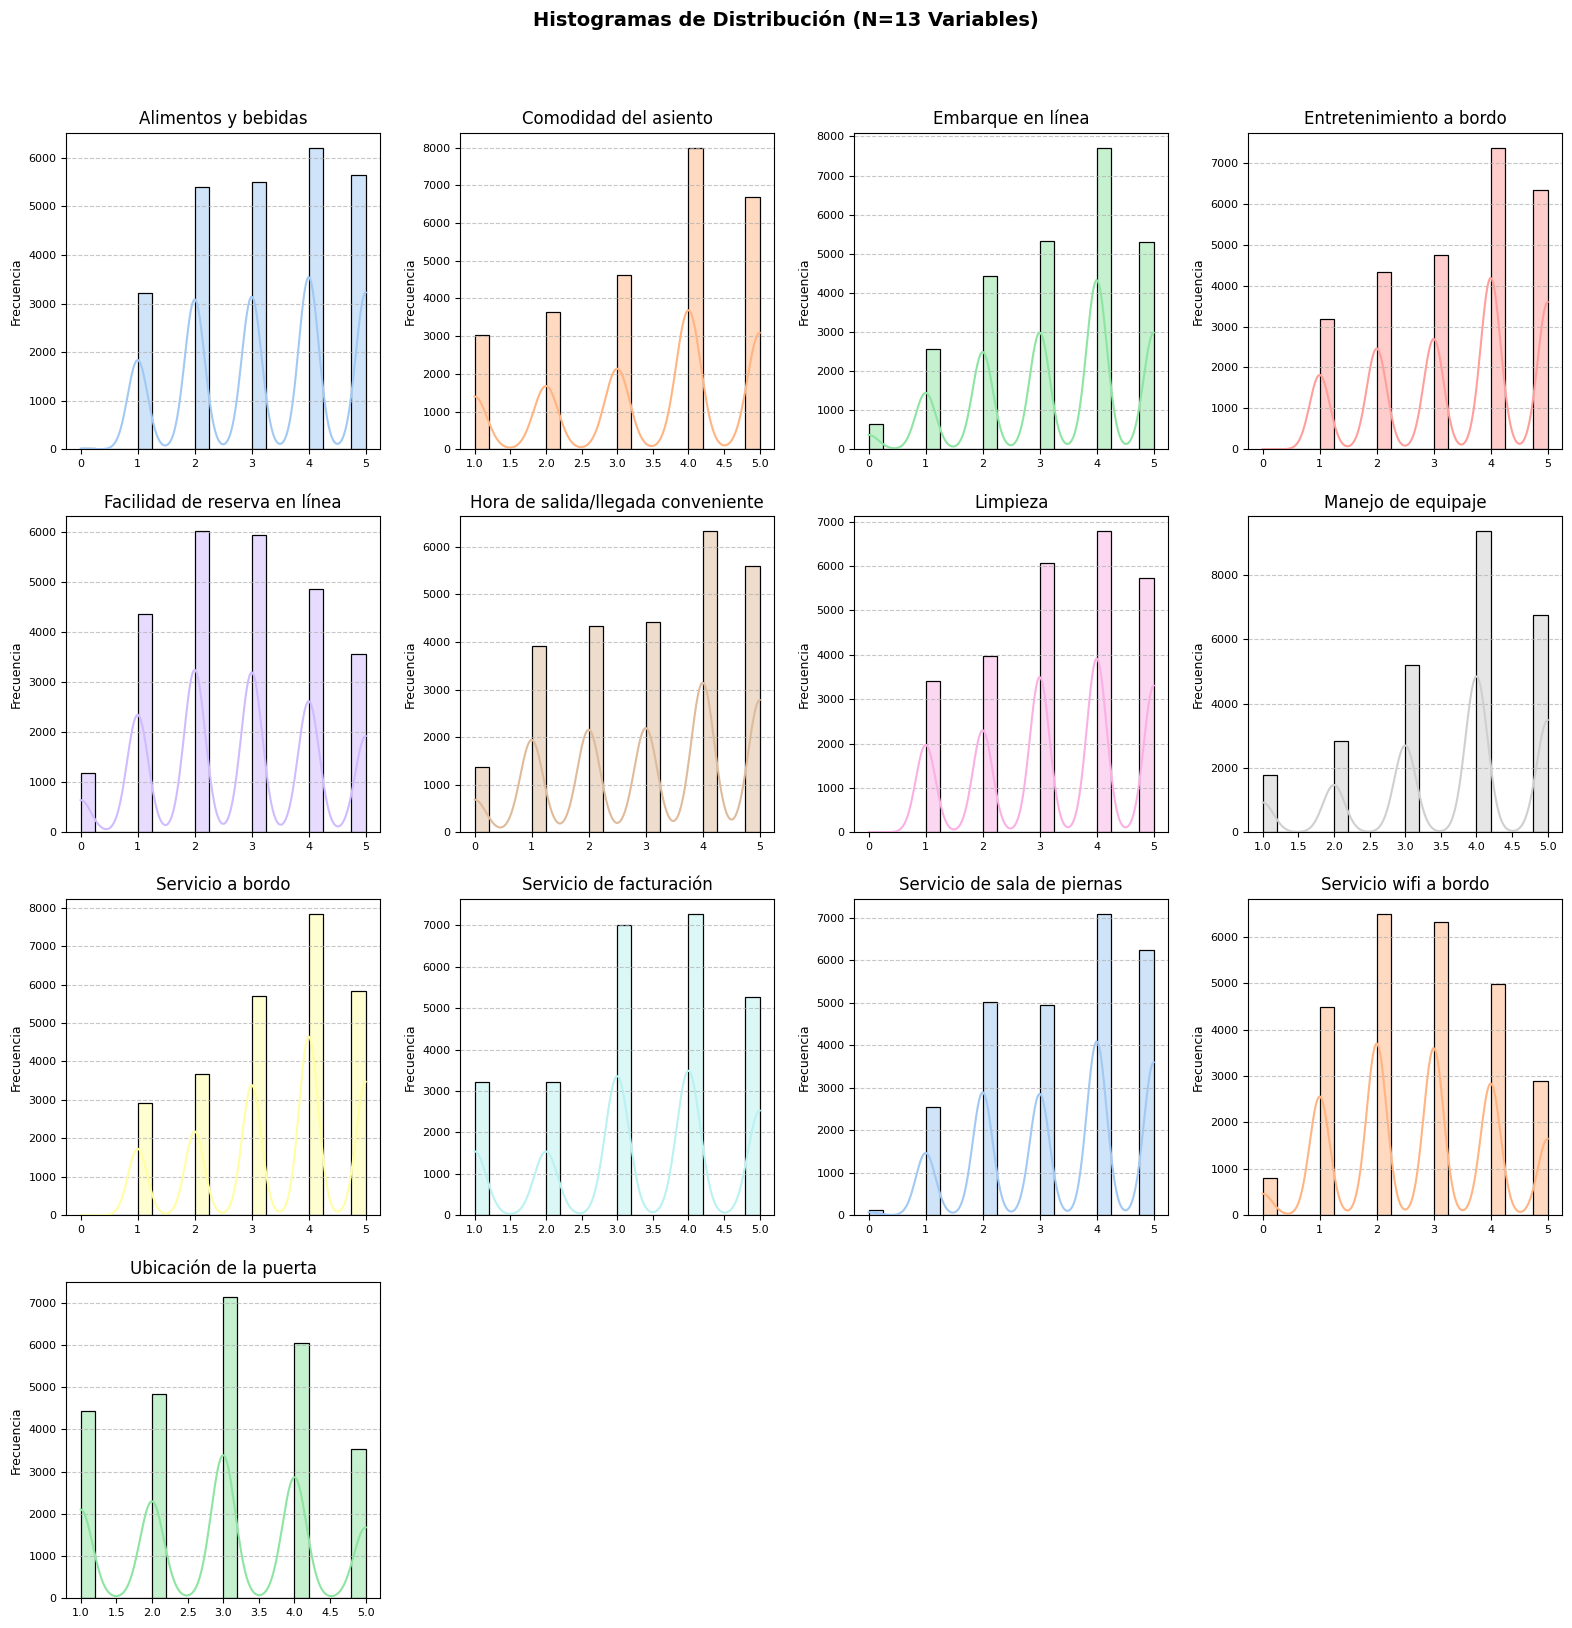

In [ ]:
visualizar_histogramas_numericos_4col(estrellas_df)

# Hallazgos

* **No hay valores ausentes.**
* **Todas las variables tienen un rango similar.**
* **Todas las variables son numéricas.**
* **No hay valores atípicos.**

# Análisis Factorial (AF)

La reducción de dimensiones es una técnica utilizada cuando el número de características o dimensiones en un conjunto de datos dado es demasiado alto. Donde se reduce la cantidad de entradas de datos a un tamaño manejable y al mismo tiempo preserva la integridad del conjunto de datos tanto como sea posible.

El **Análisis factorial** se basa en factores y su objetivo es crear factores a partir de las variables originales para representar la varianza común, es decir, la varianza debida a la correlación entre las variables observadas. Sea:

$$X_i - \mu_i = \lambda_{i1} F_1 + \lambda_{i2} F_2 + \dots + \lambda_{ik} F_k + \epsilon_i$$

* $X_i$: Es la variable observada $i$.
* $\mu_i$: Es la media o intercepto de la variable $X_i$.
* $F_1, F_2, \dots, F_k$: Son los $k$ factores comunes (variables latentes no observadas), que se asumen independientes entre sí y con media cero y varianza unitaria.
* $\lambda_{ij}$: Es la carga factorial (o loading) del factor $j$ en la variable $i$. Esta carga mide la intensidad de la relación lineal entre el factor y la variable observada.
* $\epsilon_i$: Es el término de error o factor específico (o unicidad), que representa la porción de la varianza de $X_i$ no explicada por los factores comunes. Se asume que estos errores son independientes entre sí y de los factores comunes.



## **Escalamiento**

El escalamiento es el proceso de transformar los valores numéricos de las características de un conjunto de datos para que caigan dentro de un rango específico o tengan una distribución estandarizada.

Existen dos tipos principales de escalamiento:

* Normalización (*Min-Max Scaling*): Ajusta los datos para que caigan dentro de un rango fijo, generalmente [0, 1].
* Estandarización (*Z-Score Normalization*): Transforma los datos para que tengan una media de 0 y una desviación estándar de 1.

In [ ]:
df = estrellas_df.copy()

***Los rangos de la variables son similares. No obstante, se aplica un escalamiento.***

**Librerías**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
estrellas_df.head(3)

,Alimentos y bebidas,Comodidad del asiento,Embarque en línea,Entretenimiento a bordo,Facilidad de reserva en línea,Hora de salida/llegada conveniente,Limpieza,Manejo de equipaje,Servicio a bordo,Servicio de facturación,Servicio de sala de piernas,Servicio wifi a bordo,Ubicación de la puerta
0,3,3,4,5,3,4,5,5,5,2,5,5,4
1,5,5,4,4,3,1,5,4,4,3,4,1,1
2,2,2,2,2,2,0,2,3,4,2,1,2,4


**Normalización *Z-score***

In [ ]:
columns = df.columns
df = scaler.fit_transform(df)
df = pd.DataFrame(data = df, columns = columns)

In [ ]:
df.head(3)

,Alimentos y bebidas,Comodidad del asiento,Embarque en línea,Entretenimiento a bordo,Facilidad de reserva en línea,Hora de salida/llegada conveniente,Limpieza,Manejo de equipaje,Servicio a bordo,Servicio de facturación,Servicio de sala de piernas,Servicio wifi a bordo,Ubicación de la puerta
0,-0.161739,-0.340303,0.544692,1.227138,0.172143,0.621641,1.298998,1.161716,1.259170,-1.035348,1.250974,1.703853,0.797831
1,1.340348,1.174774,0.544692,0.479907,0.172143,-1.334871,1.298998,0.311739,0.479178,-0.247517,0.492730,-1.291598,-1.542065
2,-0.912783,-1.097842,-0.930768,-1.014556,-0.535609,-1.987042,-0.974927,-0.538238,0.479178,-1.035348,-1.782001,-0.542735,0.797831


In [ ]:
info_var(df)

--- Información para la columna: Alimentos y bebidas ---

Descripción:
count    2.597600e+04
mean     5.498117e-17
std      1.000019e+00
min     -2.414870e+00
25%     -9.127827e-01
50%     -1.617392e-01
75%      5.893043e-01
max      1.340348e+00
Name: Alimentos y bebidas, dtype: float64

Valores únicos:
[-0.1617392   1.34034786 -0.91278273  0.58930433 -1.66382626 -2.41486979]


--- Información para la columna: Comodidad del asiento ---

Descripción:
count    2.597600e+04
mean    -1.100991e-16
std      1.000019e+00
min     -1.855380e+00
25%     -1.097842e+00
50%      4.172353e-01
75%      1.174774e+00
max      1.174774e+00
Name: Comodidad del asiento, dtype: float64

Valores únicos:
[-0.34030327  1.1747739  -1.09784186  0.41723532 -1.85538044]


--- Información para la columna: Embarque en línea ---

Descripción:
count    2.597600e+04
mean    -1.096888e-16
std      1.000019e+00
min     -2.406228e+00
25%     -9.307677e-01
50%      5.446921e-01
75%      5.446921e-01
max      1.282422e+00

## **Prueba de esfericidad de Bartlett**

La **prueba de esfericidad de Bartlett** evalúa la hipótesis de que las variables en una matriz de datos no están correlacionadas en la población. Específicamente, prueba si la matriz de correlación de las variables observadas es una matriz de identidad: matriz cuadrada donde todos los elementos fuera de la diagonal principal son cero (correlaciones son cero) y todos los elementos en la diagonal principal son uno (cada variable está perfectamente correlacionada consigo misma).

Hipótesis estadísticas:
* Hipótesis Nula ($H_0$): La matriz de correlación es una matriz de identidad; es decir, las variables no están correlacionadas entre sí y, por lo tanto, no hay factores subyacentes comunes.
* Hipótesis Alternativa ($H_a$): La matriz de correlación no es una matriz de identidad; es decir, existe una correlación significativa entre al menos algunas de las variables, lo que sugiere la presencia de factores comunes.


El objetivo es rechazar $H_0$. O bien, si *p-value* < 0.05, entonces se acepta $H_a$. En otras palabras, la correlación está presente entre las variables con un nivel de confianza del 95 %.

El estadístico de prueba ($V$) de Bartlett se calcula a partir del determinante de la matriz de correlación muestral ($\mathbf{R}$), y se ajusta para que siga aproximadamente una distribución $\chi^2$:

$$V = - \left( N - 1 - \frac{2p + 5}{6} \right) \ln (|\mathbf{R}|)$$

Donde:
* $V$: El estadístico de prueba (sigue una distribución $\chi^2$).
* $N$: El tamaño de la muestra (número de observaciones).
* $p$: El número de variables observadas.
* $|\mathbf{R}|$: El determinante de la matriz de correlación muestral. El determinante mide la varianza generalizada del conjunto de datos.
  * Si la matriz es de identidad (correlaciones cero), $|\mathbf{R}| \approx 1$, y $\ln(|\mathbf{R}|) \approx 0$.
  * Si hay altas correlaciones, $|\mathbf{R}|$ será pequeño, y $\ln(|\mathbf{R}|)$ será un número negativo grande, haciendo que $V$ sea grande.


El valor de $V$ se compara con el valor crítico de la distribución $\chi^2$ con los grados de libertad ($gl$):
$$gl = \frac{p(p-1)}{2}$$
Este valor corresponde al número de correlaciones no redundantes en la matriz.

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=75c0c9ee1aaffd18a81cb0c3a969d8000bbcd03d7774727cab3081a8a3b45f60
  Stored in directory: /root/.cache/pip/wheels/a2/af/06/f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor_analyzer


In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [ ]:
chi2, p = calculate_bartlett_sphericity(df)
print("Esfericidad de Bartlett")
print("Valor de Chi²:", chi2)
print("P - valor: ", p)

Esfericidad de Bartlett
Valor de Chi²: 133444.60062477522
P - valor:  0.0


In [ ]:
df.corr()

,Alimentos y bebidas,Comodidad del asiento,Embarque en línea,Entretenimiento a bordo,Facilidad de reserva en línea,Hora de salida/llegada conveniente,Limpieza,Manejo de equipaje,Servicio a bordo,Servicio de facturación,Servicio de sala de piernas,Servicio wifi a bordo,Ubicación de la puerta
Alimentos y bebidas,1.000000,0.580970,0.229601,0.627265,0.025141,-0.016006,0.659253,0.037617,0.050688,0.076775,0.035870,0.122306,-0.009694
Comodidad del asiento,0.580970,1.000000,0.415414,0.616817,0.022811,-0.001926,0.683924,0.074927,0.124805,0.182469,0.099150,0.116991,-0.000721
Embarque en línea,0.229601,0.415414,1.000000,0.279391,0.408003,0.080937,0.320912,0.084583,0.149430,0.203309,0.120354,0.459366,0.006993
Entretenimiento a bordo,0.627265,0.616817,0.279391,1.000000,0.044715,-0.022326,0.695269,0.382782,0.412266,0.114343,0.303203,0.201782,-0.000340
Facilidad de reserva en línea,0.025141,0.022811,0.408003,0.044715,1.000000,0.440230,0.010974,0.040685,0.039988,-0.000108,0.116754,0.710684,0.465514
Hora de salida/llegada conveniente,-0.016006,-0.001926,0.080937,-0.022326,0.440230,1.000000,-0.007670,0.065684,0.060982,0.082461,0.003373,0.349137,0.458439
Limpieza,0.659253,0.683924,0.320912,0.695269,0.010974,-0.007670,1.000000,0.102182,0.117546,0.165062,0.097982,0.125768,-0.014195
Manejo de equipaje,0.037617,0.074927,0.084583,0.382782,0.040685,0.065684,0.102182,1.000000,0.524981,0.240033,0.379113,0.118199,-0.004395
Servicio a bordo,0.050688,0.124805,0.149430,0.412266,0.039988,0.060982,0.117546,0.524981,1.000000,0.247438,0.366658,0.113658,-0.031606
Servicio de facturación,0.076775,0.182469,0.203309,0.114343,-0.000108,0.082461,0.165062,0.240033,0.247438,1.000000,0.150935,0.046046,-0.054954


**Se acepta $H_a$.**

## **Prueba KMO**

La **prueba Kaiser-Meyer-Olkin (KMO)** mide la proporción de la varianza en las variables observadas que podría ser común a un factor latente (o subyacente). Es decir, cuantifica el grado en que cada variable observada puede ser explicada por las otras variables en el conjunto, lo cual es esencial para el Análisis Factorial.

El resultado de la prueba es un único valor, el coeficiente KMO, que siempre cae entre 0 y 1:
* Valores cercanos a 1 indican que las correlaciones entre las variables son fuertes y compactas, y el AF es muy apropiado.
  * KMO $\geq 0.6$ Generalmente Aceptable. El AF puede proceder.
  * KMO $\geq 0.8$ Excelente. El AF es altamente adecuado.
* Valores cercanos a 0 indican que las correlaciones son débiles y dispersas, lo que sugiere que el AF no será útil, ya que no hay una estructura factorial subyacente clara.
  * KMO $< 0.5$ Inaceptable. El AF no es apropiado.

El coeficiente KMO global se define como la razón de la suma de las correlaciones al cuadrado y la suma de las correlaciones al cuadrado más las correlaciones parciales al cuadrado:
$$KMO = \frac{\sum_{i \neq j} r_{ij}^2}{\sum_{i \neq j} r_{ij}^2 + \sum_{i \neq j} a_{ij}^2}$$

Donde:
* $r_{ij}$: Es el coeficiente de correlación de Pearson entre las variables $i$ y $j$
* $a_{ij}$: Es el coeficiente de correlación parcial entre las variables $i$ y $j$.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [ ]:
kmo_all,kmo_model = calculate_kmo(df)
print(f"Prueba Kaiser-Meyer-Olkin (KMO): {kmo_model:.4f}")

Prueba Kaiser-Meyer-Olkin (KMO): 0.7605


In [ ]:
kmo_all

array([0.83730415, 0.82589017, 0.72995372, 0.74669274, 0.68795294,
       0.75275035, 0.81969168, 0.72812026, 0.71645391, 0.65356473,
       0.82513543, 0.74458963, 0.70469728])

**Ejecutar el Análisis Factorial es apropiado.**

## **Determinación del número de factores**

Sea que:

* El número de factores en el dataset es igual al número de variables.
* Todos los factores proporcionarán una cantidad significativa de información útil sobre la varianza común entre las variables.
* El número de factores se puede decidir discriminando por la cantidad de varianza común que explican los factores.
* Los valores propios no son más que la cantidad de varianza que explica el factor.

**¿Por qué debemos elegir los factores cuyos valores propios son mayores que 1?**

Según el Criterio de Kaiser (Kaiser Criterion), se retienen solo aquellos factores cuyo valor propio asociado es mayor que 1.0. Un valor propio representa la cantidad de varianza total explicada por ese factor. En una matriz de correlación estandarizada (donde la varianza total es igual al número de variables, $p$, y la varianza de cada variable es 1), un valor propio de 1.0 significa que el factor explica una cantidad de varianza equivalente a la varianza de una variable individual. Si un factor no explica al menos la varianza de una sola variable, no se considera significativo.

En una distribución normal estándar con media 0 y desviación estándar 1, la varianza será 1. Dado que hemos escalado los datos a escala estándar, la varianza de una característica es 1. Esta es la razón para seleccionar factores cuyos valores propios (varianza) son mayores que 1 es decir, los factores que explican más varianza que una sola variable observada.

In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
analisis_factores = FactorAnalyzer(rotation = None, impute = "drop", n_factors = df.shape[1])

In [ ]:
# Se calcula la matriz de correlación y la descompone para obtener los autovalores y autovectores.
analisis_factores.fit(df)

FactorAnalyzer(impute='drop', n_factors=13, rotation=None, rotation_kwargs={})

In [ ]:
arreglo_autovalores_ordenadodesc, _ = analisis_factores.get_eigenvalues()

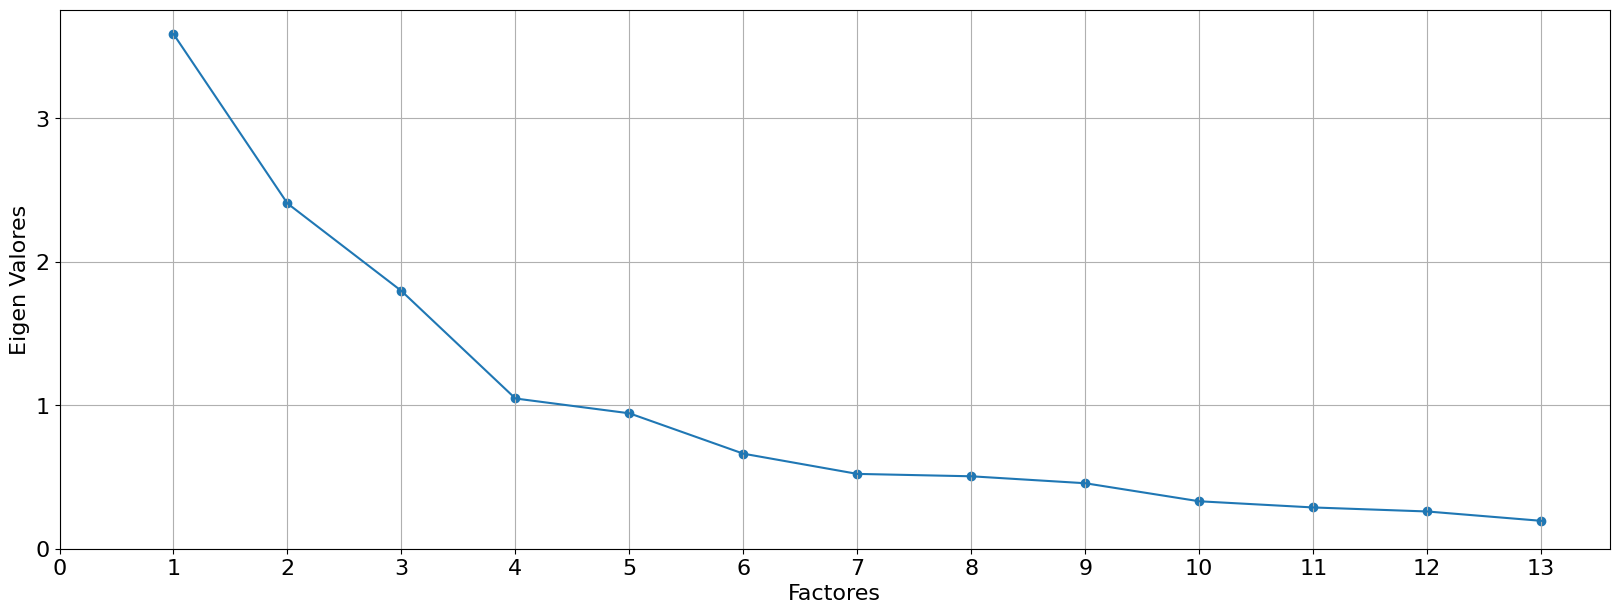

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.scatter(range(1, df.shape[1] + 1), arreglo_autovalores_ordenadodesc)
ax.plot(range(1, df.shape[1] + 1), arreglo_autovalores_ordenadodesc)

ax.set_xlabel('Factores')
ax.set_ylabel('Eigen Valores')
ax.set_xticks(ticks=np.arange(0, 14, 1))
ax.set_yticks(ticks=np.arange(0, 4, 1))
ax.grid(True)

plt.show()

**Los valores propios caen por debajo de 1 desde el cuarto factor. En conscuencia, el número óptimo de factores es 4.**

# Interpretación de los factores seleccionados

Entre las **rotaciones ortogonales** se encuentran dos tipos principales:
* Varimax: Trata de que los factores tengan unas pocas saturaciones altas y muchas casi nulas en las variables. Esto hace que haya factores con correlaciones altas con un número pequeño de variables y correlaciones nulas en el resto, quedando así redistribuida la varianza de los factores.
* Cuartimax: Trata que una variable dada esté muy correlacionada con un factor y muy poco correlacionada con el resto de factores. Se usa menos frecuentemente que la anterior.

Entre las **rotaciones oblicuas**, la más empleada es:
* Rotación Oblimín: Trata de encontrar una estructura simple sin que importe el hecho de que las rotaciones sean ortogonales, esto es, las saturaciones no representan ya la correlaciones entre los factores y las variables. Se considera un parámetro que controla el grado de correlación entre los factores, con valores preferentemente entre −0,5 y 0,5.

La ventaja principal de las rotaciones ortogonales es su simplicidad, ya que los pesos representan las correlaciones entre los factores y las variables, sin embargo esto no se cumple en el caso de las rotaciones oblicuas.

En cualquier caso, el hecho de rotar los factores siempre es controvertido ya que se pueden elegir los ejes que resulten de mayor conveniencia. Sin embargo, se puede considerar que una rotación es sólo un medio para conseguir unos ejes que permitan describir los puntos de la muestra de la manera más simple posible.


In [ ]:
# analisis_factores = FactorAnalyzer(n_factors = 4, rotation = None)
# analisis_factores.fit(df)

## **Rotación Varimax**

In [ ]:
analisis_factores = FactorAnalyzer(n_factors = 4, rotation = "Varimax")
analisis_factores.fit(df)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [ ]:
pd.DataFrame(analisis_factores.get_eigenvalues()[0], columns=['Valores Propios'])

,Valores Propios
0,3.587411
1,2.406758
2,1.796839
3,1.047160
4,0.943934
5,0.662487
6,0.521558
7,0.504867
8,0.456456
9,0.330710


## **Cargas $λ_{ij}$**

Las cargas, como se mencionó, se refieren a los coeficientes que representan la correlación entre cada variable observada y el factor latente (no observable). Es decir, indican cuánto un factor explica una variable. El puntaje de carga oscilará entre -1 y 1. Sean:
* Valores cercanos a -1 ó 1 indican que el factor tiene influencia en estas variables.
* Valores cercanos a 0 indican que el factor tiene menor influencia sobre la variable.

In [ ]:
import seaborn as sns
cm = sns.light_palette("blue", as_cmap=True)

In [ ]:
df.columns

Index(['Alimentos y bebidas', 'Comodidad del asiento', 'Embarque en línea',
       'Entretenimiento a bordo', 'Facilidad de reserva en línea',
       'Hora de salida/llegada conveniente', 'Limpieza', 'Manejo de equipaje',
       'Servicio a bordo', 'Servicio de facturación',
       'Servicio de sala de piernas', 'Servicio wifi a bordo',
       'Ubicación de la puerta'],
      dtype='object')

In [ ]:
analisis_factores.loadings_

array([[ 7.74089990e-01,  1.88495373e-02,  7.41873764e-04,
         4.45969892e-02],
       [ 7.56432843e-01, -2.85564498e-02,  8.48852908e-02,
         2.16712311e-01],
       [ 2.74192407e-01,  1.26196763e-01,  1.34683140e-01,
         7.67201343e-01],
       [ 7.75178312e-01,  4.24502041e-02,  4.62248127e-01,
         1.39127928e-02],
       [-3.31810140e-02,  7.75862673e-01,  3.89370319e-02,
         4.24131605e-01],
       [-2.32393443e-02,  5.89658968e-01,  4.24583323e-02,
        -2.44846730e-03],
       [ 8.50698687e-01, -9.78386914e-03,  8.89308712e-02,
         1.06886709e-01],
       [ 4.61184029e-02,  4.79760670e-02,  7.39282499e-01,
        -4.40473883e-02],
       [ 7.46581047e-02,  1.49487690e-02,  7.25226040e-01,
         2.52864281e-02],
       [ 9.87463212e-02, -3.76035818e-02,  2.89719478e-01,
         1.43322039e-01],
       [ 5.59266072e-02,  5.45704923e-02,  5.08387374e-01,
         6.95435658e-02],
       [ 9.04606994e-02,  6.25873367e-01,  1.39178585e-01,
      

In [ ]:
cargas = pd.DataFrame(analisis_factores.loadings_, index = df.columns).style.background_gradient(cmap = cm)

In [ ]:
cargas

,0,1,2,3
Alimentos y bebidas,0.774090,0.018850,0.000742,0.044597
Comodidad del asiento,0.756433,-0.028556,0.084885,0.216712
Embarque en línea,0.274192,0.126197,0.134683,0.767201
Entretenimiento a bordo,0.775178,0.042450,0.462248,0.013913
Facilidad de reserva en línea,-0.033181,0.775863,0.038937,0.424132
Hora de salida/llegada conveniente,-0.023239,0.589659,0.042458,-0.002448
Limpieza,0.850699,-0.009784,0.088931,0.106887
Manejo de equipaje,0.046118,0.047976,0.739282,-0.044047
Servicio a bordo,0.074658,0.014949,0.725226,0.025286
Servicio de facturación,0.098746,-0.037604,0.289719,0.143322


Variables explicadas según cada factor:
* **Factor 0**:
    * Alimentos y bebidas.
    * Comodidad del asiento.
    * Entretenimiento a bordo.
    * Limpieza.
* **Factor 1**:
    * Facilidad de reserva en línea.
    * Hora de salida/llegada conveniente.
    * Servicio wifi a bordo.
    * Ubicación de la puerta.
* **Factor 2**:
    * Manejo de equipaje.
    * Servicio a bordo.
    * Servicio de sala de piernas.
* **Factor 3**:
    * Embarque en línea.  

## **Diferencias**

El autovalor es una **característica del FACTOR** (columna en la matriz de cargas).
El **autovalor** para un factor específico es la suma de los cuadrados de las cargas factoriales de ese factor a través de todas las variables observadas.
$$\lambda_j = \sum_{i=1}^{p} \lambda_{ij}^2$$

Donde:
* $\lambda_j$ es el autovalor para el Factor $j$, y $\lambda_{ij}$ es la carga de la Variable $i$ en el Factor $j$.

Como las cargas factoriales representan la correlación entre la variable y el factor, el autovalor representa la cantidad de varianza total que ese factor es capaz de "capturar" o "explicar" en el conjunto de datos. La cantidad de varianza explicada por cada factor se puede averiguar usando la función '*get_factor_variance*'.

Cuando el Análisis Factorial se realiza sobre una matriz de correlación, ocurre que:
* La varianza de cada variable individual es 1.
* La varianza total del sistema es igual al número total de variables ($p$).
* Por lo tanto, el autovalor de un factor indica la cantidad de varianza (en unidades de variables originales) que es explicada por ese factor.


La **rotación** ajusta los ejes factoriales en el espacio multivariado para lograr la "Estructura Simple" (Simple Structure), que facilita la interpretación:
* Maximizar las Cargas Altas: Intenta que cada variable tenga una carga muy alta (cercana a $\pm 1$) en un solo factor y cargas cercanas a cero en todos los demás.
* Claridad del Factor: Al asignar claramente cada variable a un solo factor, se vuelve mucho más fácil nombrar y definir el constructo latente que ese factor representa.

Al atender la rotación ocurre que:
* En los casos no rotados, las varianzas serían iguales a los valores propios.
* La rotación cambia la distribución de la varianza proporcional, pero la varianza acumulativa seguirá siendo la misma.
* Las rotaciones oblicuas permiten la correlación entre los factores, mientras que las rotaciones ortogonales mantienen los factores sin correlación.


In [ ]:
analisis_factores.get_factor_variance()

(array([2.60177396, 1.84752375, 1.68800163, 1.06988807]),
 array([0.20013646, 0.14211721, 0.12984628, 0.08229908]),
 array([0.20013646, 0.34225367, 0.47209995, 0.55439903]))

In [ ]:
diferencia = pd.DataFrame(analisis_factores.get_factor_variance(), index=['Varianza Total Explicada por Factor','Varianza Proporcional','Varianza Proporcional Acumulada'])

In [ ]:
diferencia

,0,1,2,3
Varianza Total Explicada por Factor,2.601774,1.847524,1.688002,1.069888
Varianza Proporcional,0.200136,0.142117,0.129846,0.082299
Varianza Proporcional Acumulada,0.200136,0.342254,0.472100,0.554399


**Los 4 factores juntos explican el 55.44 % de la varianza total.**



## **Comunidades**

La comunalidad es una **característica de la VARIABLE** (fila en la matriz de cargas). La **comunalidad** ($h^2$) de una variable ($i$) es la proporción de su varianza total que es compartida con (o explicada por) el conjunto de factores comunes extraídos y retenidos en el modelo.

La comunalidad para la variable $i$ se calcula como la suma de los cuadrados de sus cargas factoriales ($\lambda$) a través de todos los $k$ factores retenidos:$$h_i^2 = \sum_{j=1}^{k} \lambda_{ij}^2
$$

Aunque, las rotaciones no tienen ninguna influencia sobre la comunalidad de las variables.



In [ ]:
comunidades = pd.DataFrame(analisis_factores.get_uniquenesses(), index = df.columns, columns = ['Unicidad'])

In [ ]:
comunidades

,Unicidad
Alimentos y bebidas,0.398440
Comodidad del asiento,0.372824
Embarque en línea,0.302155
Entretenimiento a bordo,0.183430
Facilidad de reserva en línea,0.215532
Hora de salida/llegada conveniente,0.649954
Limpieza,0.256883
Manejo de equipaje,0.447093
Servicio a bordo,0.467610
Servicio de facturación,0.884357


**Aproximadamente, el 39.8 % de la varianza de la variable "Alimentos y bebidas"  es explicada por todos los factores juntos.**

# **F I N**